In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import combinations

In [3]:
def generate_subsets(n):
    # Generate all possible subsets of size 1 to n.
    for size in range(1, n + 1):
        for subset in combinations(range(n), size):
            yield subset
            # print(subset)


def check_p(matrix):
    n = len(matrix)

    # Compute the determinant of the whole matrix first.
    determinant = np.linalg.det(matrix)
    if determinant <= 0:
        return False  # Return immediately if the whole matrix has a non-positive determinant

    # Check the determinants of diagonal elements (smallest subset) next.
    for i in range(n):
        submatrix = matrix[i, i]
        if submatrix <= 0:
            return False  # Return immediately if any diagonal element is non-positive

    # Initialize the generator to get subsets.
    subset_generator = generate_subsets(n)

    # Check the determinants of other subsets.
    for subset in subset_generator:
        if len(subset) > 1:
            submatrix = matrix[np.ix_(subset, subset)]
            determinant = np.linalg.det(submatrix)
            if determinant <= 0:
                return False  # Return immediately if a non-positive determinant is found

    return True # Return True if all determinants are positive


def generate_matrix(n):
    # Generate a random matrix with values between -1 and 1
    matrix = np.random.uniform(-1, 1, (n, n))
    # Set diagonal elements to 1
    np.fill_diagonal(matrix, 1)
    
    return matrix

In [4]:
# n = 3
# iterations = 100
# kappa = 0.5
# all_p = 0
# G1_p_G2_p_G_n = 0
# G1_n_G2_p_G_p = 0
# G1_n_G2_p_G_n = 0
# G1_n_G2_n_G_p = 0
# non_p = 0

# for i in range(iterations):
#     G1 = generate_matrix(n)
#     G2 = generate_matrix(n)
#     G = kappa * G1 + (1 - kappa) * G2
#     result1 = check_p(G1)
#     result2 = check_p(G2)
#     result = check_p(G)
    
#     if result1 & result2 & result:
#         all_p += 1
#     elif result1 & result2 & (not result):
#         G1_p_G2_p_G_n += 1
#     elif (result1 & (not result2) & result) or ((not result1) and result2 and result):
#         G1_n_G2_p_G_p += 1
#     elif (result1 & (not result2) & (not result)) or ((not result1) and result2 and (not result)):
#         G1_n_G2_p_G_n += 1
#     elif (not result1) and (not result2) and result:
#         G1_n_G2_n_G_p += 1
#     elif (not result1) and (not result2) and (not result):
#         non_p += 1

    
# print("layers have a unique NE and so does the Multiplex: ", all_p)
# print("layers have a unique NE but the Multiplex does not: ", G1_p_G2_p_G_n)
# print("only one layer has a unique NE and so does the Multiplex: ", G1_n_G2_p_G_p)
# print("only one layer has a unique NE but the Multiplex does not: ", G1_n_G2_p_G_n)
# print("no layer has a unique NE but the Multiplex does: ", G1_n_G2_n_G_p)
# print("no layer has a unique NE and neither does the Multiplex: ", non_p)
# print("total: ", all_p + G1_p_G2_p_G_n + G1_n_G2_p_G_p + G1_n_G2_p_G_n + G1_n_G2_n_G_p + non_p)

# # categories = ['Layers and Multiplex \u2192 NE', 'Both layers \u2192 NE\nMultiplex \u219B NE', 'One layer \u2192 NE\nMultiplex \u2192 NE', 'One layer \u2192 NE\nmultiplex \u219B NE', 'Neither the layers nor\nthe Multiplex with NE']


In [6]:
# n_list = [3, 4, 5, 6, 7, 8, 9, 10]

# # Setting up subplots with shared y-axis
# fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8), sharey=True, gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

# for i, n in enumerate(n_list):
#     all_p = 0
#     G1_p_G2_p_G_n = 0
#     G1_n_G2_p_G_p = 0
#     G1_n_G2_p_G_n = 0
#     G1_n_G2_n_G_p = 0
#     non_p = 0

#     iterations = 100
#     kappa = 0.5

#     for j in range(iterations):
#         G1 = generate_matrix(n)
#         G2 = generate_matrix(n)
#         G = kappa * G1 + (1 - kappa) * G2
#         result1 = check_p(G1)
#         result2 = check_p(G2)
#         result = check_p(G)

#         if result1 & result2 & result:
#             all_p += 1
#         elif result1 & result2 & (not result):
#             G1_p_G2_p_G_n += 1
#         elif (result1 & (not result2) & result) or ((not result1) and result2 and result):
#             G1_n_G2_p_G_p += 1
#         elif (result1 & (not result2) & (not result)) or ((not result1) and result2 and (not result)):
#             G1_n_G2_p_G_n += 1
#         elif (not result1) and (not result2) and result:
#             G1_n_G2_n_G_p += 1
#         elif (not result1) and (not result2) and (not result):
#             non_p += 1

#     # Creating a bar plot for each n in a subplot
#     categories = ['Layers and Multiplex \u2192 NE', 'Both layers \u2192 NE\nMultiplex \u219B NE', 'One layer \u2192 NE\nMultiplex \u2192 NE', 'One layer \u2192 NE\nmultiplex \u219B NE', 'Neither the layers nor\nthe Multiplex with NE']
#     counts = [all_p, G1_p_G2_p_G_n, G1_n_G2_p_G_p, G1_n_G2_p_G_n, non_p]
#     total_counts = sum(counts)
    
#     percentages = [count / total_counts * 100 for count in counts]

#     row_index = i // 4
#     col_index = i % 4

#     bars = axes[row_index, col_index].barh(categories, percentages, color='skyblue')

#     # Remove axis lines and ticks
#     axes[row_index, col_index].spines['top'].set_visible(False)
#     axes[row_index, col_index].spines['right'].set_visible(False)
#     axes[row_index, col_index].spines['bottom'].set_visible(False)
#     axes[row_index, col_index].spines['left'].set_visible(False)
#     axes[row_index, col_index].tick_params(axis='both', which='both', length=0)
    
#     # Remove x-axis numbers
#     axes[row_index, col_index].get_xaxis().set_visible(False)

#     axes[row_index, col_index].set_title(f'n={n}')

#     # Adding data values on top of the bars
#     for bar, percentage in zip(bars, percentages):
#         axes[row_index, col_index].text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{percentage:.1f}%',
#                                         va='center', ha='left', fontsize=8)

# # Adjust layout
# plt.tight_layout()
# plt.savefig('multiplex.png', dpi=600)
# plt.show()

In [10]:
n_list = [3, 4, 5, 6, 7, 8, 9, 10]
kappa = 0.5
iterations = 10000

# Create lists to store counts
condition_true_counts = []
condition_flase_counts = []
not_helpful_list =[]
total_counts = []

for n in n_list:
    condition_true_count = 0
    condition_false_count = 0
    not_helpful = 0
    total_count = 0

    for i in range(iterations):
        G1 = generate_matrix(n)
        G2 = generate_matrix(n)*2
        np.fill_diagonal(G2, 1)
        
        G = kappa * G1 + (1 - kappa) * G2
        result1 = check_p(G1)
        result2 = check_p(G2)
        result = check_p(G)

        lambda_min_G2 = np.min(np.linalg.eigvals(G2 - np.eye(n)))
        lambda_max_G1 = np.max(np.linalg.eigvals(G1 - np.eye(n)))
        condition = abs(lambda_min_G2) >= (1 / (1 - kappa)) * (1 + (kappa * lambda_max_G1))
                
        # Check the conditions for unique NEs
        if (result1 & (not result2)) or ((not result1) & result2):
            if not result:
                total_count += 1
                # Check condition for the matrices here
                if condition:
                    condition_true_count += 1

    condition_true_counts.append(condition_true_count)
    total_counts.append(total_count)

percentages = [condition_true_count / total_count * 100 if total_count > 0 else 0 for condition_true_count, total_count in zip(condition_true_counts, total_counts)]

In [13]:
print(condition_true_counts)
print(total_counts)

[131, 324, 458, 486, 281, 140, 30, 8]
[972, 2230, 2985, 2462, 1272, 419, 77, 11]


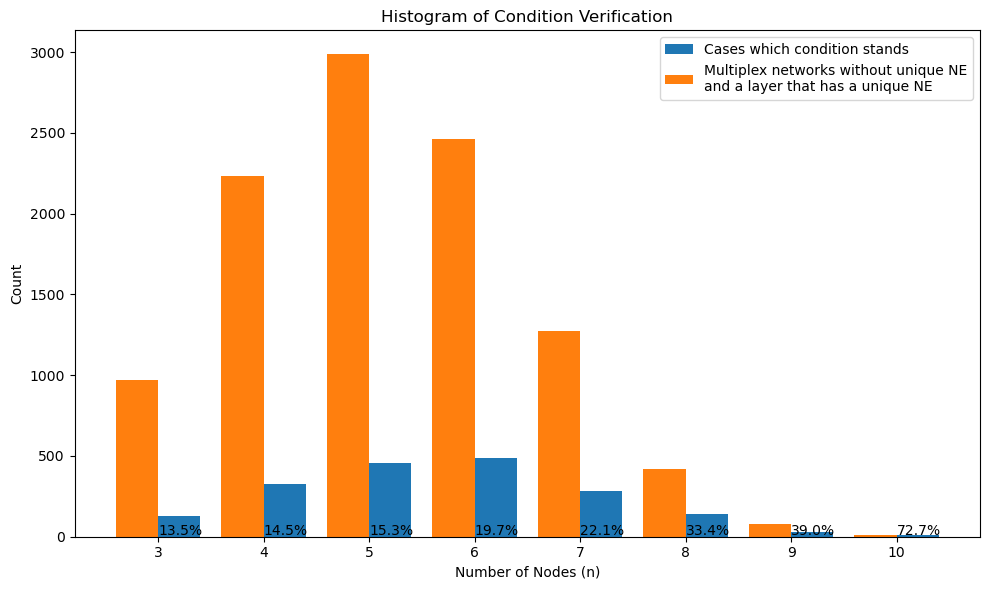

In [12]:
# Plotting the histogram
fig, ax = plt.subplots(figsize=(10, 6))

width = 0.4
x = np.arange(len(n_list))

bar1 = ax.bar(x + width/2, condition_true_counts, width, label='Cases which condition stands')
bar2 = ax.bar(x - width/2, total_counts, width, label='Multiplex networks without unique NE\nand a layer that has a unique NE')

ax.set_xlabel('Number of Nodes (n)')
ax.set_ylabel('Count')
ax.set_title('Histogram of Condition Verification')
ax.set_xticks(x)
ax.set_xticklabels(n_list)
ax.legend()

for i, v in enumerate(percentages):
    ax.text(i, 8, f'{v:.1f}%')


plt.tight_layout()
# plt.savefig('multiplex3.png', dpi=600)
plt.show()

In [19]:
def generate_negative_matrix(n):
    # Generate a random matrix with values between -1 and 0
    matrix = np.random.uniform(-1, 0, (n, n))
    
    # Set diagonal elements to 1
    np.fill_diagonal(matrix, 1)
    
    return matrix

def check_condition(G1, G2, kappa):
    lambda_max_G2 = np.max(np.linalg.eigvals(G2))
    lambda_max_G1 = np.max(np.linalg.eigvals(G1))
    zeta = (1 - kappa * (1 - kappa)) / (kappa * (1 - kappa))
    condition = lambda_max_G2 < (zeta - lambda_max_G1) / (1 + lambda_max_G1)
    return condition

def is_m_matrix(matrix):
    B = matrix - np.eye(n)
    rho = np.max(np.abs(np.linalg.eigvals(-B)))
    return rho < 1

iterations = 5000
n_list = [3, 4, 5, 6, 7, 8, 9, 10]
kappa = 0.5

for n in n_list:
    for i in range(iterations):
        G1 = generate_negative_matrix(n)
        G2 = generate_matrix(n)
        G = kappa * G1 + (1 - kappa) * G2
        result1 = check_p(G1)
        result2 = check_p(G2)
        result = check_p(G)
        # max eigvals list for G1
        lambda_max_G1 = np.max(np.linalg.eigvals(G1))
        lambda_max_G2 = np.max(np.linalg.eigvals(G2))
        if result1:
            if is_m_matrix(G1):
                condition = lambda_max_G2 < ((2 * kappa - 1) / (1 - kappa)) - ((kappa / (1 - kappa)) * lambda_max_G1)
                if condition & (not result):
                    print("fuck")
        # lambda_max_G1_list.append(lambda_max_G1)

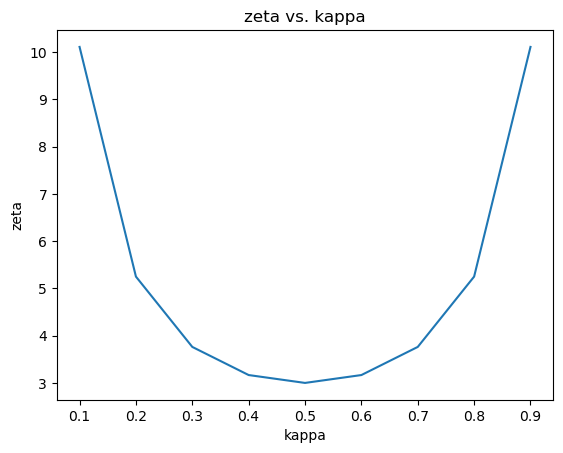

In [14]:
import matplotlib.pyplot as plt

kappa_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
zeta_values = [(1 - kappa * (1 - kappa)) / (kappa * (1 - kappa)) for kappa in kappa_values]

plt.plot(kappa_values, zeta_values)
plt.xlabel('kappa')
plt.ylabel('zeta')
plt.title('zeta vs. kappa')
plt.show()
